 12%|█▏        | 120/1000 [00:00<00:03, 236.67it/s]


120
[[ 0.         -5.         -5.         ... -5.         -5.
   0.        ]
 [ 0.         -2.48617771 -3.46078703 ... -3.46332494 -2.48755329
   0.        ]
 [ 0.         -1.48415506 -2.44517226 ... -2.45021393 -1.48688821
   0.        ]
 ...
 [ 0.          1.48440147  2.4456603  ...  2.45067339  1.48711803
   0.        ]
 [ 0.          2.48618569  3.46080334 ...  3.46335605  2.48756924
   0.        ]
 [ 0.          5.          5.         ...  5.          5.
   0.        ]]


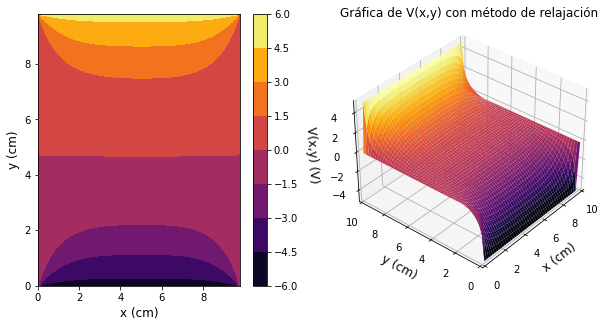

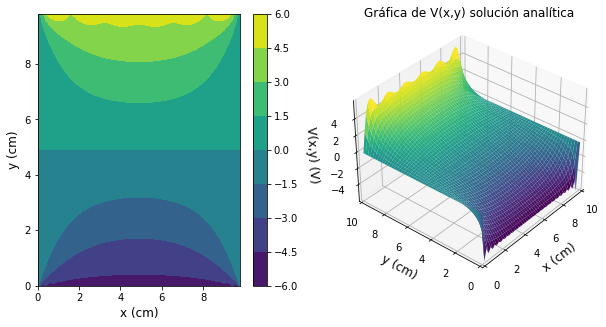

In [1]:
#importar las librerias necesarias
import numpy as np #permite visualizar gráficos 
import matplotlib.pyplot as plt #proporcionar mapas de colores para visualizaciones
from matplotlib import cm #barra de progreso visual para iteraciones
from tqdm import tqdm


"""Establecer de manera preferencial los valores de pasos 
   en X que sería N y en Y que sería M, asi como el valor del
   voltaje vo y el paso dx=dy
"""

N = 50 #puntos en x
M = 50 #puntos en y
vo = 5 #valor de voltaje 
dx = 0.2 #pasos

def par_iniciales (N, M, dx):
    """
    Calcula longitud a y b a partir de los puntos en cada eje coordenado
    y genera un arreglo para x, y.
    Parámetros:
        N(int): Puntos en x
        M(int): Puntos en y
        dx(float): paso tanto para x como y ya que dx=dy
    Return:
        X,Y (matriz): Rejilla coordenadas bidimensional
    """
    a = (N-1)*dx
    b = (M-1)*dx
    x = np.linspace(0,a,N)
    y = np.linspace(0,b,M)
    
    X,Y = np.meshgrid(x,y)
    
    return X,Y


    
def InitialV (N, M, vo):
    """
    Calcula o establece el voltaje en cada una de las fronteras.
    Parámetros:
        N(int): Puntos en x
        M(int): Puntos en y
        vo(int): Valor del potencial
    Return:
        V(matriz): Contiene los valores de voltaje inicializados
        según las condiciones de frontera especificadas.
    """

    V = np.zeros((N,M))
    
    vup = vo
    vdown = -vo
    vleft = 0
    vright = 0
  
    V[0,:] = vup
    V[-1,:] = vdown
  
    V[:,0] = vleft
    V[:,-1] = vright
  
    return V

V = InitialV(N,M,vo)


def Evolution(N,M, V, Nit = int(1e3), tolerancia = 0.0001):
    """
    Calcula o establece el voltaje en cada una de las fronteras.
    Parámetros:
        N(int): Puntos en x
        M(int): Puntos en y
        V(matriz): Valor del potencial en los bordes
        Nit(int): Número de iteraciones para alcanzar convergencia
        tolerancia(flota): Tolerancia para convergencia
    Return:
        V(matriz): Contiene los valores de voltaje despues de las iteraciones
        realizadas.
    """
    #Iniciar contador de iteraciones en 0
    itmax = 0
    #iterar hasta número máximo de iteraciones 
    for iterar in tqdm(range(Nit)):
        #almacenar el cambio máximo en el valor de voltaje durante una iteración.
        dmax = 0.
        #Iteracion sobre indices interiores de la matriz V
        for i in range(1, N-1):
            for j in range(1, M-1):
                #Calcular valor promedio vecinos cercanos
                V_cerca = (V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])/4 #
                #Calcular cambio valor voltaje de la celda
                vf = V_cerca - V[i, j]
                #Asigna el valor promedio de voltajes de celdas vecinas
                V[i,j] = V_cerca 
                #Actualiza el valor dmax
                if np.abs(vf) > dmax:
                    dmax = vf
        #Comprobar si cambio maximo de voltaje es menor que la tolerancia
        if np.abs(dmax) < tolerancia:
            print(iterar)
            iter_max = iterar
            break
            
    return V,iter_max

#resultado de Evolution se almacena
v_cambio = Evolution(N,M,V)
#Toma primera parte de resultado almacenado
V_difer = v_cambio[0][::-1] 

print(V_difer)

#Se calcula la gradilla para la gráfica
R,Z = par_iniciales(N,M,dx)


#se realizan los plots a gráficar
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(1, 2, 2, projection='3d', elev=35, azim=220)


# Plotear el contorno en el primer subplot
c = ax.contourf(R,Z, V_difer, cmap="inferno")
ax.set_xlabel('x (cm)', fontsize=12)
ax.set_ylabel('y (cm)', fontsize=12)
fig.colorbar(c, ax=ax)

# Realizar configuración en subplot en 3D.
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 10)
ax1.set_xlabel('x (cm)', fontsize=12)
ax1.set_ylabel('y (cm)', fontsize=12)
ax1.set_zlabel('V(x,y) (V)', fontsize=12)
ax1.set_title('Gráfica de V(x,y) con método de relajación')
# Plotear la superficie en 3D en el segundo subplot
ax1.plot_surface(R,Z, V_difer, cmap="inferno")

# Mostrar el gráfico
plt.show()


#Solución analitica

a = (N-1)*dx
b = (M-1)*dx

def sol_analitica(x,y,a,b,vo,N):
    """
    Calcula el voltaje a partir de la solución analítica.
    Parámetros:
        x(array): Coordenadas x
        y(array): Coordenadas y
        b(float): Longitud en y
        a(float): Longitud en x
        vo(int): valor potencial en bordes
        N(int): número pasos
            
    Return:
        V(matriz): Matriz con potencial electrico de la cuadicula.
    """

    V = np.zeros_like(X)
    for n in range(1, N+1):
        V += (((2 * vo * ((-1)**n - 1) )/ (np.pi * n) )* np.sin(n * np.pi * x / a) *
              (np.cosh(n * np.pi * y / a ) -
              ((1 / np.tanh(n * np.pi * b / a )) + (1 / np.sinh(n * np.pi * b / a ))) *
                np.sinh(n * np.pi * y / a )))
        
    return V

#Establecer gradilla a utilizar
x = np.linspace(0, a, N)
y = np.linspace(0, b, N)
X, Y = np.meshgrid(x, y)

# Calcular el potencial analítico
V_ana = sol_analitica(X, Y, a, b, vo, N)

#Crear los plot de cada una de las funciones 
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122, projection='3d', elev=35, azim=220)


# Plotear el contorno en el primer subplot
c = ax.contourf(X,Y, V_ana, cmap="viridis")
ax.set_xlabel('x (cm)', fontsize=12)
ax.set_ylabel('y (cm)', fontsize=12)
fig.colorbar(c, ax=ax)

# Realizar configuración en subplot en 3D.
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 10)
ax1.set_xlabel('x (cm)', fontsize=12)
ax1.set_ylabel('y (cm)', fontsize=12)
ax1.set_zlabel('V(x,y) (V)', fontsize=12)
ax1.set_title('Gráfica de V(x,y) solución analítica')
# Plotear la superficie en 3D en el segundo subplot
ax1.plot_surface(X,Y, V_ana, cmap="viridis")